In [1]:
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt

%matplotlib inline

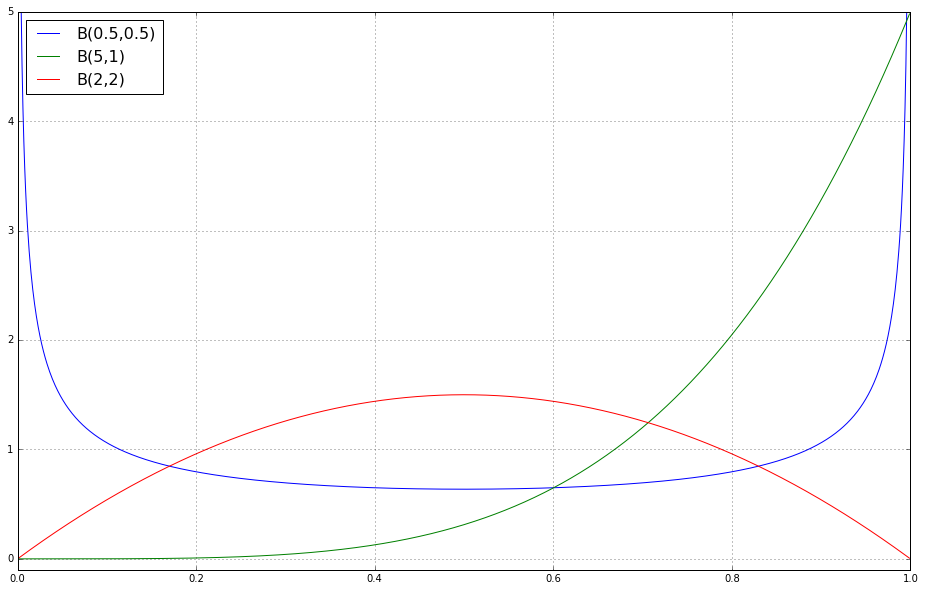

In [2]:
N = 20

hyperparameters = [(.5, .5), (5, 1), (2, 2)]

grid = np.arange(0, 1, .001)

plt.figure(figsize=(16,10))

for (alpha, beta) in hyperparameters:
    plt.plot(grid, sps.beta.pdf(grid, alpha, beta), 
             label='B({},{})'.format(alpha, beta))
    
plt.ylim(-0.1, 5)
plt.grid()
plt.legend(fontsize=16, loc=2)
plt.show()
    

Сопряженным распределением к $Bern(p)$ является $B(\alpha, \beta)$. Выберем параметры $\alpha$ и $\beta$ следующим образом: 

$Beta(0.5, 0.5)$ - априорное распределение "скорее нечестной" монеты;

$Beta(5, 1)$ - априорное распределение "скорее нечестной с перевесом в сторону герба" монеты;

$Beta(2, 2)$ - априорное распределение "скорее честной" монеты.



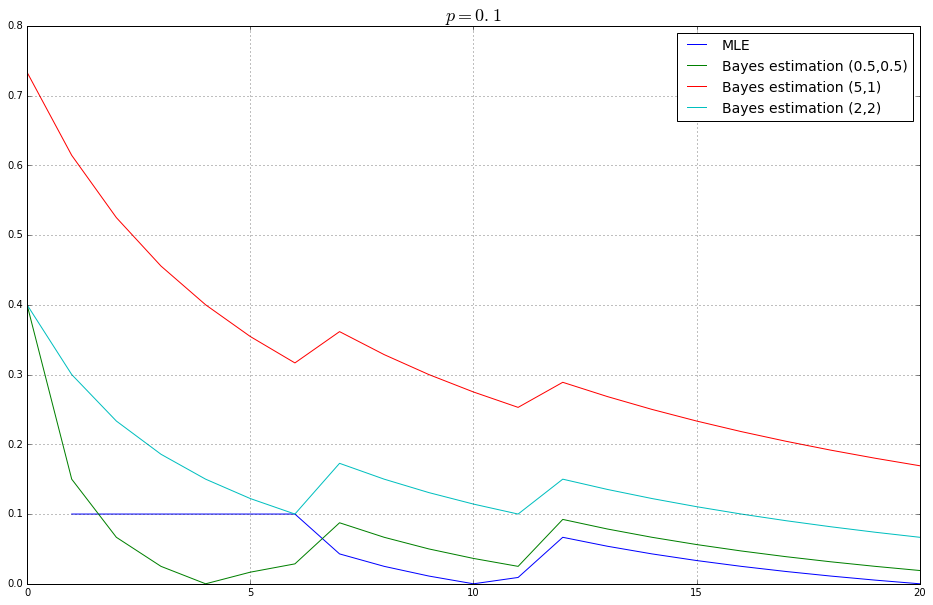

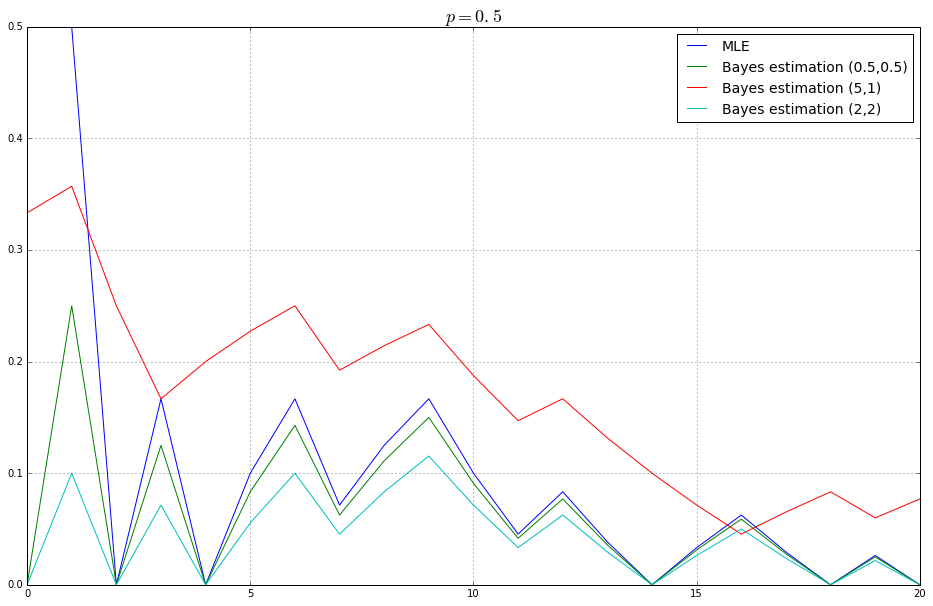

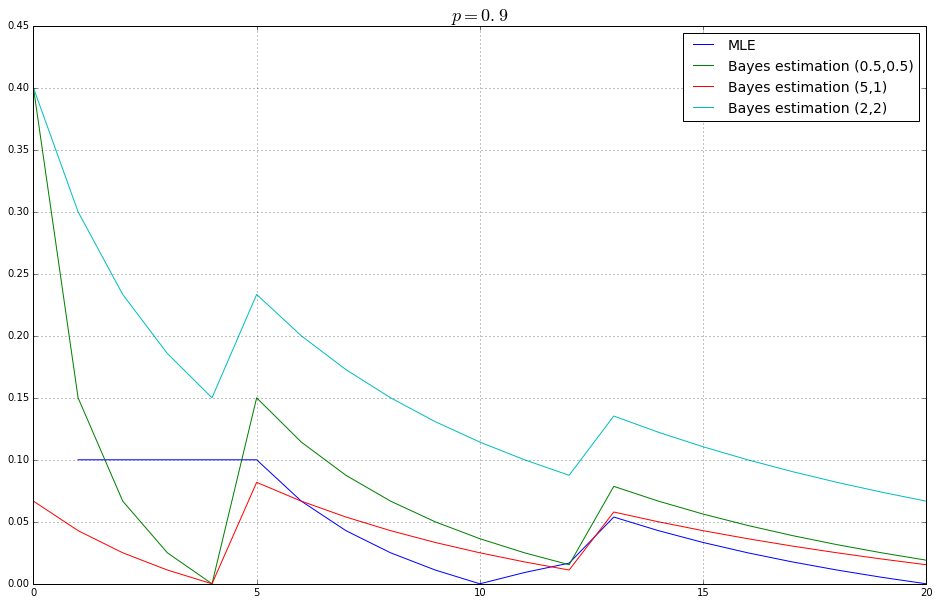

In [5]:
for p in [.1, .5, .9]:
    sample = sps.bernoulli.rvs(p=p, size=N)
    
    plt.figure(figsize=(16, 10))
    
    max_likelihood_estimation = [abs(sample[:n].mean() - p) 
                                 for n in range(1, N + 1)]
    plt.plot(range(1, N + 1), max_likelihood_estimation, label='MLE')
    
    for (alpha, beta) in hyperparameters:
        bayes_estimation = [abs((alpha + sample[:n].sum()) / (n + alpha + beta) - p)
                           for n in range(N + 1)]
        plt.plot(range(N + 1), bayes_estimation, 
                 label='Bayes estimation ({},{})'.format(alpha, beta))
        
    plt.grid()
    plt.title('$p=' + str(p) + '$', fontsize=18)
    plt.legend(fontsize=14)
    plt.show()

Для $p = 0.1$ лучшими оценками оказались байесовская с априорным распределением "скорее нечестной" монеты и оценка максимального правдободобия.

Для $p = 0.5$ лучшей оказалась байесовская оценка с априорным распределением "скорее честной" монеты.

И для $p = 0.9$ лучшими оценками оказались байесовская оценка с априорным распределением "нечестной в сторону герба" монеты и оценка максимального правдоподобия.

